In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
g = 9.81
R = 287.00

###################Extract Standard Atmosphere T0###########################
def cal(p0, t0, a, h0, h1):
    if a != 0:
        t1 = t0 + a * (h1 - h0)
        p1 = p0 * (t1 / t0) ** (-g / a / R)
    else:
        t1 = t0
        p1 = p0 * math.exp(-g / R / t0 * (h1 - h0))
    return t1, p1

def Satm(altitude):
    a = [-0.0065, 0, 0.001, 0.0028]
    h = [11000, 20000, 32000, 47000]
    p0 = 101325
    t0 = 288.15
    prevh = 0
    if altitude < 0 or altitude > 47000:
        print("altitude must be in [0, 47000]")
        return
    for i in range(0, 4):
        if altitude <= h[i]:
            temperature, pressure = cal(p0, t0, a[i], prevh, altitude)
            break;
        else:
            t0, p0 = cal(p0, t0, a[i], prevh, h[i])
            prevh = h[i]
    return temperature, pressure

z = np.arange(0,21000,1000);
t = np.zeros((z.shape))
p = np.zeros((z.shape))

for k in range(z.size):
    t1,p1=Satm(z[k]);
    t[k] = t1; p[k] = p1;
    
T0 = t;

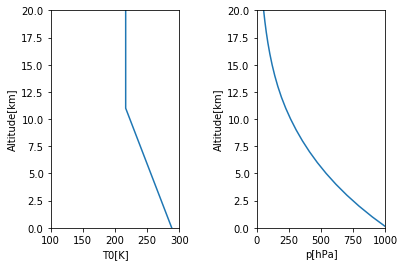

In [2]:
plt.subplots_adjust(wspace=0.6, hspace=0.5)
plt.subplot(1,2,1);plt.plot(t,z/1000); plt.axis([100,300,0,20]);
plt.xlabel('T0[K]');plt.ylabel('Altitude[km]');
plt.subplot(1,2,2);plt.plot(p/100,z/1000); plt.axis([0,1000,0,20]);
plt.xlabel('p[hPa]');plt.ylabel('Altitude[km]');

In [3]:
################Solve for Homework#################
##########(1)############
g = 9.81; Cp = 1005  #J/kg/K;
gammad = g/Cp; dz = 1000.0;
Tlapse = gammad*z;
s = 0;
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
for k in range(z.size):
    s = s+(x-Tlapse[k])/T0[k]*dz;
x1 = solve(s-20000,x);

print '(1)The gas must be as hot as '+str(x1[0])+'K to reach a maximum altitude of 20km';

##########(2)############
x = Symbol('x')
x2 = solve((x-Tlapse[-1]-T0[-1])/T0[-1],x);

print '(2)The gas must be as hot as '+str(x2[0])+'K to reach an equilibrium altitude of 20km';

##########(3)############
w = Symbol('w')
s = 0;
for k in range(z.size):
    s = s+g*(T0[0]-Tlapse[k]-T0[k])/T0[k]*dz;
w0 = solve(s+w**2/2,w);

print '(3)The gas must have a initial velocity of '+str(w0[1])+'m/s to reach a maximum altitude of 20km';


(1)The gas must be as hot as 326.439019587815K to reach a maximum altitude of 20km
(2)The gas must be as hot as 411.873880597014K to reach an equilibrium altitude of 20km
(3)The gas must have a initial velocity of 294.669088356794m/s to reach a maximum altitude of 20km


In [4]:
##########(4)############
gammad = 0.0055;
Tlapse = gammad*z;
s = 0;
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
for k in range(z.size):
    s = s+(x-Tlapse[k])/T0[k]*dz;
x11 = solve(s-20000,x);
print 'Using reduced lapse rate:'
print '(1)'+str(x11[0])+'K'

x = Symbol('x')
x22 = solve((x-Tlapse[-1]-T0[-1])/T0[-1],x);
print '(2)'+str(x22[0])+'K'

w = Symbol('w')
s = 0;
for k in range(z.size):
    s = s+g*(T0[0]-Tlapse[k]-T0[k])/T0[k]*dz;
w00 = solve(s+w**2/2,w);

print '(3)'+str(w00[1])+'m/s'


Using reduced lapse rate:
(1)281.522390058161K
(2)326.649999999999K
(3)89.3664156711706m/s


In [5]:
##########(5)############
T0 = T0[3::]; z = z[3::];
g = 9.81; Cp = 1005  #J/kg/K;
gammad = g/Cp; dz = 1000.0;
Tlapse = gammad*z;
s = 0;
x = Symbol('x')
for k in range(z.size):
    s = s+(x-Tlapse[k])/T0[k]*dz;
x111 = solve(s-20000,x);

print 'If gases are emitted from 3km:'
print '(1)'+str(x111[0])+'K'

x = Symbol('x')
x222 = solve((x-Tlapse[-1]-T0[-1])/T0[-1],x);

print '(2)'+str(x222[0])+'K'

w = Symbol('w')
s = 0;
for k in range(z.size):
    s = s+g*(T0[0]-Tlapse[k]-T0[k])/T0[k]*dz;
w000 = solve(s+w**2/2,w);

print '(3)'+str(w000[1])+'m/s'


If gases are emitted from 3km:
(1)369.233736254858K
(2)411.873880597014K
(3)341.013095534005m/s
